<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 7000)
start, end

(datetime.datetime(2005, 8, 26, 2, 26, 55, 970630),
 datetime.datetime(2024, 10, 25, 2, 26, 55, 970630))

In [3]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [4]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                     Adj Close                               Close  \
Ticker                         AAPL       MSFT      NVDA TSLA      AAPL   
Date                                                                      
2005-08-26 00:00:00+00:00  1.379511  18.926865  0.221033  NaN  1.633571   
2005-08-29 00:00:00+00:00  1.382527  19.053186  0.221415  NaN  1.637143   
2005-08-30 00:00:00+00:00  1.404543  19.074232  0.229363  NaN  1.663214   
2005-08-31 00:00:00+00:00  1.414195  19.214600  0.234485  NaN  1.674643   
2005-09-01 00:00:00+00:00  1.395194  19.088280  0.234561  NaN  1.652143   

Price                                                    High             ...  \
Ticker                          MSFT      NVDA TSLA      AAPL       MSFT  ...   
Date                                                                      ...   
2005-08-26 00:00:00+00:00  26.969999  0.241000  NaN  1.655000  27.080000  ...   
2005-08-29 00:00:00+00:00  27.150000  0.241417  NaN  1.643929  27.230000  ...   
2005-08-30 00:00:00+00:00  27.180000  0.250083  NaN  1.671071  27.230000  ...   
2005-08-31 00:00:00+00:00  27.379999  0.255667  NaN  1.679643  27.440001  ...   
2005-09-01 00:00:00+00:00  27.200001  0.255750  NaN  1.684643  27.389999  ...   

Price                           Low           Open                            \
Ticker                         NVDA TSLA      AAPL       MSFT      NVDA TSLA   
Date                                                                           
2005-08-26 00:00:00+00:00  0.238667  NaN  1.647143  27.059999  0.245000  NaN   
2005-08-29 00:00:00+00:00  0.236833  NaN  1.616786  26.809999  0.238750  NaN   
2005-08-30 00:00:00+00:00  0.240667  NaN  1.642500  27.059999  0.241000  NaN   
2005-08-31 00:00:00+00:00  0.248750  NaN  1.673571  27.170000  0.249500  NaN   
2005-09-01 00:00:00+00:00  0.253583  NaN  1.678571  27.379999  0.254917  NaN   

Price                         Volume                            
Ticker                          AAPL      MSFT       NVDA TSLA  
Date                                                            
2005-08-26 00:00:00+00:00  261058000  36774600  323436000  NaN  
2005-08-29 00:00:00+00:00  256295200  52307700  343392000  NaN  
2005-08-30 00:00:00+00:00  518761600  55163200  948852000  NaN  
2005-08-31 00:00:00+00:00  402956400  65210200  906804000  NaN  
2005-09-01 00:00:00+00:00  356367200  75974500  556884000  NaN  

[5 rows x 24 columns]

In [5]:
df.index

DatetimeIndex(['2005-08-26 00:00:00+00:00', '2005-08-29 00:00:00+00:00',
               '2005-08-30 00:00:00+00:00', '2005-08-31 00:00:00+00:00',
               '2005-09-01 00:00:00+00:00', '2005-09-02 00:00:00+00:00',
               '2005-09-06 00:00:00+00:00', '2005-09-07 00:00:00+00:00',
               '2005-09-08 00:00:00+00:00', '2005-09-09 00:00:00+00:00',
               ...
               '2024-10-11 00:00:00+00:00', '2024-10-14 00:00:00+00:00',
               '2024-10-15 00:00:00+00:00', '2024-10-16 00:00:00+00:00',
               '2024-10-17 00:00:00+00:00', '2024-10-18 00:00:00+00:00',
               '2024-10-21 00:00:00+00:00', '2024-10-22 00:00:00+00:00',
               '2024-10-23 00:00:00+00:00', '2024-10-24 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4823, freq=None)

In [6]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [7]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
2005-08-26 00:00:00+00:00,1.633571,26.969999,0.241000,NaN
2005-08-29 00:00:00+00:00,1.637143,27.150000,0.241417,NaN
2005-08-30 00:00:00+00:00,1.663214,27.180000,0.250083,NaN
2005-08-31 00:00:00+00:00,1.674643,27.379999,0.255667,NaN
2005-09-01 00:00:00+00:00,1.652143,27.200001,0.255750,NaN


In [8]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,4823.000000,4823.000000,4823.000000,3606.000000
mean,53.266885,108.096197,9.729723,78.016969
std,61.404022,115.111684,22.129936,103.427363
min,1.633571,15.150000,0.147500,1.053333
25%,9.009464,28.260000,0.380750,11.904500
50%,25.660000,46.040001,0.671500,17.686000
75%,67.106251,155.394997,6.567500,173.440002
max,236.479996,467.559998,143.710007,409.970001


<Axes: xlabel='Date'>

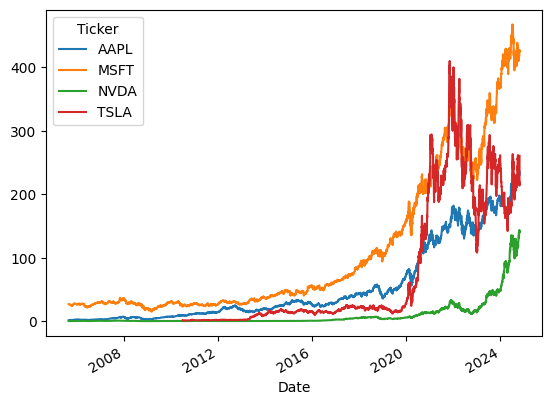

In [9]:
Close.plot()

# Twitter Data Collection
https://www.youtube.com/watch?v=AFeXivA7Hh4

In [10]:
#following this tutorial https://www.youtube.com/watch?v=AFeXivA7Hh4
import requests
import pandas as pd


In [11]:
twitter_data = []

In [27]:
%%time
payload = {
    'api_key': 'fc77ba882232c929cdaa788e34e06b92',
    'query':'Stock',
    'num': '100'

}
response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)
data=response.json()


CPU times: user 38.8 ms, sys: 7.57 ms, total: 46.4 ms
Wall time: 4.48 s


In [13]:
data

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "AT&T's stock is beating Verizon's by a lot in 2024. Here's where analysts stand. From marketwatch.com.",
   'highlighs': ['stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Evan (@StockMKTNewz) / X',
   'snippet': 'Free Stock Market News that is FAST, ACCURATE, CONSISTENT, and RELIABLE | Not Just Stock News | My Daily Stock Market Recap is the link in my bio',
   'highlighs': ['Stock', 'Stock', 'Stock'],
   'link': 'https://twitter.com/stockmktnewz',
   'displayed_link': '481.9K+ followers'},
  {'position': 2,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸',
   'highlighs': ['Stock'],
   'link': 'https://twitter.

# Reddit Data Collection

https://www.youtube.com/watch?v=8KrUCXlAN4Q

In [14]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 10.5 MB/s eta 0:00:00


In [15]:
import praw
import asyncpraw
import asyncio
from datetime import datetime, timedelta

In [16]:
reddit = praw.Reddit(client_id='pY3DRqwGM2HOIsepjKe3tg',
                     client_secret='qHWhNgd3AsLI6R7jiqHNiowS37PZyQ',
                     user_agent='StockBot')

In [26]:

%%time
subreddit = reddit.subreddit('wallstreetbets')

for post in subreddit.hot(limit=10):
    print(f"Title: {post.title}")
    # print(f"Content: {post.selftext}")
    print(f"Author: {post.author}")
    print(f"Upvotes: {post.score}")
    print(f"Comments: {post.num_comments}")
    print(f"URL: {post.url}")
    # print('-' * 80)
    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        print(comment.body)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: What Are Your Moves Tomorrow, October 25, 2024
Author: wsbapp
Upvotes: 71
Comments: 2719
URL: https://www.reddit.com/r/wallstreetbets/comments/1gbbs0c/what_are_your_moves_tomorrow_october_25_2024/


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



There's no amount of DD you can do to convince me TSLA can hold this price ![img](emote|t5_2th52|4267)![img](emote|t5_2th52|4271)
My options contracts are "out of the money", and coincidentally, so am I
Finally had the balls to step up to my work crush, had lunch together. She said only low effort men do coffee or drinks for a first date, and that she’s a dinner date type of girl. Complained about dating for like 30 mins, men wanting to be treated like princesses, expecting a woman to pay half or bills, etc

I think I’m going to die alone holding onto these MSFT 450C. They’ve done a great job fucking me so far.
TSLA adds the value of Honda, Volkswagen, ford, and BMW combined in one day to its market cap…LMFAO ￼​￼​![img](emote|t5_2th52|4271)
Just about 400K Tesla puts were bought in the last 15 minutes of the day.
Made only 1k today when Tesla was printing millionaires ![img](emote|t5_2th52|4260)
Stop wondering if you are good enough.

You are not.

Have a good day.
I don’t want a milli

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Earnings is a pretty generous word for Boeing ![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)
Oh my, just when I thought I would take a break from gambling lol ![img](emote|t5_2th52|4267)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4640)
I like to sniff glue before trading, so calls on 3M
TSLA, everyone said puts lol. Funny af
TSLA 180 or 300 EOW no in between
Some implied moves - these are up or down degenerates

  
$TSLA 7.4%

$IBM 5.8%

$BA 5.6%

$DECK 9.4%

$SKX 10.1%

$EW 11.7%

$DXCM 14.2%

$T 4.8%

$LRCX 6.8%

$NOW 6.2%

$VKTX 8.0%

$UPS 6.0%

$VKTX 8.0%

$LVS 6.0%

$URI 5.9%

$AAL 8.3%

$LUV 5.7%

$CARR 7.2%

$HOG 8.2%
> Tuesday, power hour: buy BA puts (50% port)  
  
> Wednesday, lunch time: sell BA puts  
  
> Wednesday, power hour: buy TSLA puts (50% port)  
  
> Thursday, lunch time: sell TSLA puts  
  
> Thursday, power hour: buy Lambo
I only need 1 of these to hit big...


Somebody, give me a dart....🫴
Puts on Logitech thank me later

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 3 | **First Seen In WSB** | 2 years ago
**Total Comments** | 11 | **Previous Best DD** | 
**Account Age** | 3 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Dude made 130k dollars in one day and didn't sell lol
Dude has a day trading restriction and also not done with 1000% gains. You truly belong here.
I think I saw your balls on the big screen in Transformers 2: Dark Of The Moon
Do it again tomorrow
Who has 10k to just “yolo”😭😭😭
https://preview.redd.it/qjw73xtgprwd1.jpeg?width=1249&format=pjpg&auto=webp&s=c43c32a85b6df772082aa537a2b2442a18f96f46
I did almost the exact same thing, except I turned $100 into $1400

![img](emote|t5_2th52|31224)
You spent $10,000 on a lottery ticket and won.  Congratulations!
You had 51K a year ago! Wondering how many YOLO’s failed
Congrats and fuck you
Hit that all button
I've always heard " the markets can stay irrational longer than you can stay solvent" but today I felt it

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 10 | **First Seen In WSB** | 3 years ago
**Total Comments** | 343 | **Previous Best DD** | [x](https://www.reddit.com/r/wallstreetbets/comments/n1t0yz/i_analyzed_all_the_motley_fool_premium/) [x](https://www.reddit.com/r/wallstreetbets/comments/mtehdq/i_analyzed_all_700_buy_and_sell_recommendations/) [x](https://www.reddit.com/r/wallstreetbets/comments/oawsxf/i_analyzed_last_15_years_of_news_articles_to_see/) [x](https://www.reddit.com/r/wallstreetbets/comments/rvuzw8/should_you_listen_to_jim_cramer_i_analyzed_20000/) 
**Account Age** | 4 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
TIL the century started in 1999
"Just had" - bitch, there's over 2 months left, you just jinxed us.
Why stop there, the election is still 12 days away
True regard. Take a look everyone
If you’re going to claim the century started in 99 why not just say millennia
Whos gonna tell OP the year ends Dec 31st
More like it's just cat

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 9 months ago
**Total Comments** | 15 | **Previous Best DD** | 
**Account Age** | 9 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
I was ready to give OP a handjob then I found out he’s just one of us ![img](emote|t5_2th52|4271)
I turned 53k into 4k one time
yep, I knew I was going to see posts like this. I saw the “buy calls” post and watched that ship sail. Couldve woken up as a millionaire today *sigh*
https://preview.redd.it/ojv27e58sqwd1.jpeg?width=640&format=pjpg&auto=webp&s=3f3c67d5431bdff46f512ce9637faa90079e6bf4
I turned $1800 to $9100 lol
I turned 100 k into 10k , then 10
K into 20 and 30 k, followed by 50 k, overall half of my investment. Hell yea buy high and sell low.
I turned $6 into a Costco pumpkin pie.
https://preview.redd.it/2tlm56nz9rwd1.jpeg?width=900&format=pjpg&auto=webp&s=f6c6f2b1005788ee6cbeefaeb68d032c9894e063
I’m sure they won’t be in this sub
Makes $500k

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 10 | **First Seen In WSB** | 1 year ago
**Total Comments** | 4709 | **Previous Best DD** | 
**Account Age** | 3 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Ok so calls?
I was told FSD by 2016 so I’m not really sure what the issue is. Surely it’s been up and running for a decade at this point \s
Its not even sure HW4 can handle full FSD. Getting the last 10% of accuracy might require 2-10 times compute
No body cares look at the stock this morning.
Tesla tanks my LiDAR investment with their false promises and has a completely nonsensical valuation. This is not a cassino it's a circus.
But if it does support dipshit jumping, that's fine.
If you're paying to beta test a product you're being scammed
Bad news? 400% upside
I think it’s more accurate to say Tesla acknowledged that it might not work and they would upgrade hardware as necessary if that comes to pass.
i dont understand how anyone believes they can 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 4 | **First Seen In WSB** | 3 years ago
**Total Comments** | 463 | **Previous Best DD** | 
**Account Age** | 11 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Because Fiverr is not based on hiring freelancers to do coding. There are many verticals on there, and many are far from being replicable with AI.
My bosses can’t open .pdfs, so I think they will pay freelancers to “do ai” for them.

I think you greatly underestimate just how out of touch rich middle management is.

Just like there are people running “social media” by watching Twitter pages and making Facebook posts.  Yes it’s insane, but there they are anyway.
- _"I was afraid AI would take my job, until I remembered how my clients communicate their requirements"_

The general public's ability to communicate what they want/need is abysmal. A human needs to talk/explain/negotiate/clarify things before giving a very simple prompt to any AI. 

Even my o

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 9 | **First Seen In WSB** | 2 years ago
**Total Comments** | 487 | **Previous Best DD** | [x](https://www.reddit.com/r/wallstreetbets/comments/16rnmrl/bull_week/) [x](https://www.reddit.com/r/wallstreetbets/comments/1gai1a7/tsla_the_dd_of_a_lifetime/) 
**Account Age** | 4 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
it's crazy that your post probably led to people making hundreds of thousands of dollars and you got a cool 4k out of it. good call regardless my dude
wsb should buy this guy a lambo

he's as legend as the intel guy but he made wsb earn money
Lots of respect for you OP. Hope this big win boost your moral! The rough times have nothing on you!
https://preview.redd.it/xv9n0h8tiqwd1.jpeg?width=828&format=pjpg&auto=webp&s=a9040b04bc5471da765b9c1ec8533c23461ca4bc

Thanks Tesla. Left one open $215 call open
I stupidly sold my TSLA shares last week, absolutely sobbing
Thanks for sharing, don’t be asha

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 7 | **First Seen In WSB** | 6 months ago
**Total Comments** | 1187 | **Previous Best DD** | 
**Account Age** | 7 months | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Boeing is terrible at negotiating. It gave workers a “best and final offer” three offers ago
![img](emote|t5_2th52|4271)
Dont even play with this shit company, just let it go peacefully. I cant recount how many times I played this and got burned by insider trades. Remember that failed launch shit they pulled?
Boeing leadership has taken what was once the golden child in engineering into a disastrous, mismanaged piece of shit company that can't seem to manage the same vehicles they've produced for decades. All their short term moves in making earnings happy is finally biting them in the ass. If you want innovation, PAY YOUR FUCKING PEOPLE.  PUTS on Boeing ![img](emote|t5_2th52|4275)
My observation is that Unions do not go on strike for pay they go ba

In [18]:
#will be collecting data from the last 5 years
five_years_ago = datetime.utcnow() - timedelta(days=5*365)
five_years_ago_timestamp = int(five_years_ago.timestamp())

In [19]:
top_posts = []
for post in subreddit.top(time_filter='all', limit=10000):  # Fetch more posts to ensure we get 10 within the past 5 years
    # Check if the post is within the past 5 years
    if post.created_utc >= five_years_ago_timestamp:
        top_posts.append(post)
    if len(top_posts) >= 10000:
        break  # We have collected the top 10 posts within the past 5 years

print(f"Collected {len(top_posts)} posts from the past 5 years.")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Collected 940 posts from the past 5 years.


In [20]:
print(top_posts)

[Submission(id='l8rf4k'), Submission(id='l6wu59'), Submission(id='l78uct'), Submission(id='l846a1'), Submission(id='l881ia'), Submission(id='l6x130'), Submission(id='lnqgz8'), Submission(id='l6ekdz'), Submission(id='lae6j0'), Submission(id='l7feld'), Submission(id='l8c0u4'), Submission(id='l890i7'), Submission(id='l6jobf'), Submission(id='l79x17'), Submission(id='l90oq6'), Submission(id='l74tr1'), Submission(id='l9kn3z'), Submission(id='lazmky'), Submission(id='l79jko'), Submission(id='l7nces'), Submission(id='msblc3'), Submission(id='lb8jtk'), Submission(id='l7z8pf'), Submission(id='m0q5bm'), Submission(id='l7c6kb'), Submission(id='m4i2ib'), Submission(id='lb6jld'), Submission(id='l7bh1m'), Submission(id='lawubt'), Submission(id='l70b59'), Submission(id='l78yde'), Submission(id='l8tw56'), Submission(id='l92fas'), Submission(id='lafh4d'), Submission(id='lt7v4w'), Submission(id='l7aj2e'), Submission(id='la8n7o'), Submission(id='lbykxg'), Submission(id='l7weuu'), Submission(id='l7qwvo'),